# Iris Recognition

Questo algoritmo di **riconoscimento dell'iride** è in grado di confrontare due immagini di iridi e determinare se appartengono alla stessa persona.

Inizialmente le due immagini degli occhi vengono acquisite e pre-trattate per migliorare la qualità e rimuovere il rumore. Poi l'iride viene isolata dal resto dell'occhio utilizzando algoritmi di bordo e mascheratura. Viene estratto un template dell'iride come un array di valori di intensità. e infine vengono confrontati i due array calcolando la similarità utilizzando la similarità del coseno.

Facendo vari test è stata definita una soglia sopra la quale le due iridi si possono considerare della stessa persona.

0.9344964750666367
Le iridi appartengono alla stessa persona.


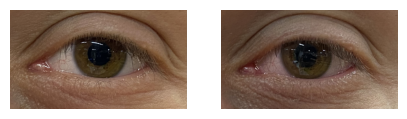

In [13]:
import cv2
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

def estrai_template_iride(immagine_occhio):
    # Pre-trattamento
    immagine_grigia = cv2.cvtColor(immagine_occhio, cv2.COLOR_BGR2GRAY)
    immagine_grigia = cv2.GaussianBlur(immagine_grigia, (5, 5), 0)
    immagine_grigia = cv2.equalizeHist(immagine_grigia)

    # Segmentazione
    kernel = cv2.getGaborKernel((21, 21), 5.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    immagine_filtrata = cv2.filter2D(immagine_grigia, cv2.CV_8UC3, kernel)
    _, iris_threshold = cv2.threshold(immagine_filtrata, 50, 255, cv2.THRESH_BINARY)
    contorni, _ = cv2.findContours(iris_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    massimo_contorno = max(contorni, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(massimo_contorno)

    # Estrazione del template
    iris_template = cv2.resize(immagine_grigia[y:y+h, x:x+w], (50, 50))

    return iris_template

def confronta_template(template1, template2):
    # Reshape i template in array 2D con una sola feature
    template1_reshape = template1.reshape(1, -1)
    template2_reshape = template2.reshape(1, -1)

    # Similarità
    similarita = cosine_similarity(template1_reshape, template2_reshape)[0][0]

    return similarita


# Carica le immagini
occhio1 = cv2.imread('occhio1.jpg')
occhio2 = cv2.imread('occhio2.jpg')

# Mostra le immagini
occhio1_rgb = cv2.cvtColor(occhio1, cv2.COLOR_BGR2RGB)
occhio2_rgb = cv2.cvtColor(occhio2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.imshow(occhio1_rgb)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(occhio2_rgb)
plt.axis('off')

# Estrai i template
template_iride1 = estrai_template_iride(occhio1)
template_iride2 = estrai_template_iride(occhio2)

# Confronta i template
similarita = confronta_template(template_iride1, template_iride2)

# Stampa la similarità
print(similarita)

# Imposta una soglia di similarità
soglia_similarita = 0.93

if similarita >= soglia_similarita:
    print("Le iridi appartengono alla stessa persona.")
else:
    print("Le iridi appartengono a persone diverse.")
